In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="lBeRX0ddTHzL4Dk8rJ1l")
project = rf.workspace("dlc-ai").project("goals-g8wao")
dataset = project.version(2).download("coco-segmentation")

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to goals-2 in coco-segmentation:: 100%|██████████████| 252/252 [00:00<00:00, 492.19it/s]


In [15]:
import pandas as pd 
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np


In [16]:
dataDir=Path('C:\\Users\\viers\\OneDrive\\Bureaublad\\MCT\\sem4\\IndustryProject\\IndustryProject\\SegmentationUnet\\goals-2\\train')
annFile = Path('C:\\Users\\viers\\OneDrive\\Bureaublad\\MCT\\sem4\\IndustryProject\\IndustryProject\\SegmentationUnet\\goals-2\\train\\_annotations.coco.json')
coco = COCO(annFile)
catIds = coco.getCatIds(catNms=['Goal']) 
imgIdsGoal = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds()
imgsGoal = coco.loadImgs(imgIdsGoal)
imgs = coco.loadImgs(imgIds)
print("Number of images containing goal:", len(imgIdsGoal))
print("Number of images",len(imgIds))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Number of images containing goal: 243
Number of images 243


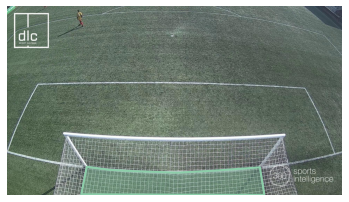

In [17]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(str(dataDir)+"\\"+str(img['file_name']))/255.0

plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)


1080
1920


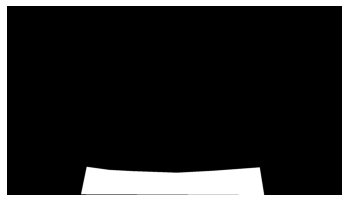

In [18]:
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

mask = np.zeros((img['height'],img['width']))
print(img['height'])
print(img['width'])
for i in range(len(anns)):
    className = 'Goal'
    mask = np.maximum(coco.annToMask(anns[0])*1, mask)
plt.axis('off')
plt.imshow(mask,cmap='gray')


frame_4_12254_jpg.rf.067524253bc08cb62f3e9cd07ecb2840.jpg
frame_4_12220_jpg.rf.09ea6bd30da4455f0ec6e8e4d7bfa599.jpg
frame_4_12282_jpg.rf.055e507261c51540d82c82e58a151eb0.jpg
frame_4_12157_jpg.rf.0aacb219c5f8c4677ad0ca20d25f30a4.jpg
frame_4_9335_jpg.rf.0c817d5a14e3df4a2715baa849442795.jpg
frame_4_12255_jpg.rf.05787e2253be48ce900091bfcde5ae9c.jpg
frame_4_8020_jpg.rf.07bed891d375457fd19754ae50ebbce2.jpg
frame_4_12176_jpg.rf.034e66f2a08a7cb5dbcd136f573f7f0d.jpg
frame_4_12154_jpg.rf.06a8ce45046162ad7a2521a6aa37ba6e.jpg
frame_4_12179_jpg.rf.10c61d719dcc1bf571787e937d8728dd.jpg
frame_4_12266_jpg.rf.1161fd60b60dcffb81689fa60c7db002.jpg
frame_4_12232_jpg.rf.09fef70d623a0746638a18868f445675.jpg
frame_0_459_jpg.rf.0f22ee2c5778394e47df0f1a96df4e25.jpg
frame_4_12223_jpg.rf.0eb6bbcd3a4430afece2693e1fcfee6a.jpg
frame_4_12244_jpg.rf.0ff8ce99618620f2c3e3b0350351d65e.jpg
frame_0_461_jpg.rf.0b7772c6acfb2722eebb05c51ea3d988.jpg
frame_4_12283_jpg.rf.0bdc556c8061500e5e9a3adb8d7f4044.jpg
frame_4_12258_jpg.rf

frame_4_12228_jpg.rf.9e76934c6e749de9f4d8d773dc3ac7e4.jpg
frame_0_451_jpg.rf.9859a26747ded101590644e74daf6a63.jpg
frame_0_992_jpg.rf.9ed647aa3a2487ca6c2519c193969435.jpg
frame_4_12177_jpg.rf.9287dc6bb34f25e6e94194b499a8ce1f.jpg
frame_0_471_jpg.rf.9c96c0e4690d5df34602c3f6393874d0.jpg
frame_0_460_jpg.rf.a06e1352febbd27b740b425e578649c9.jpg
frame_4_8022_jpg.rf.a22c3d7e85ab4c9fbeca2cf99c5b8723.jpg
frame_0_463_jpg.rf.9f81d1e92760d947d4fa12ce358deb49.jpg
frame_4_5274_jpg.rf.9eeb0d544baf7bc1d0f19665c6f5a8df.jpg
frame_0_2147_jpg.rf.a95d9b1e7502cb78b94916e5e7c4705d.jpg
frame_4_12210_jpg.rf.894555be637230b19e35d411fbc5eb5f.jpg
frame_4_9316_jpg.rf.a60f51ddb518ac4417dd1db23009ea27.jpg
frame_4_12253_jpg.rf.a96dfc7e38208fc3936144dd32238a10.jpg
frame_4_12217_jpg.rf.b288b0aebf2dc41c63520e941be8c6f2.jpg
frame_4_12164_jpg.rf.a880d1e7c69039919d5301ae2bb54fe3.jpg
frame_4_9318_jpg.rf.a5aa56d917c3f7c855749787367ecdd2.jpg
frame_4_11551_jpg.rf.a6208d5997b53d70b7382006c38a607b.jpg
frame_4_9333_jpg.rf.b8e91bb03

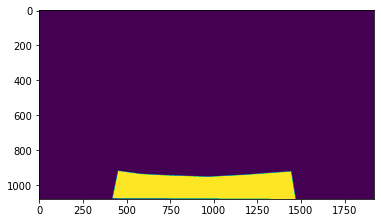

In [19]:
import cv2


for img in imgs:
    print(img['file_name'])
    mask = np.zeros((img['height'],img['width']))
    I = io.imread(dataDir/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    for i in range(len(anns)):
        frame = coco.annToMask(anns[0])*1
        frame_normed = 255 * (frame - frame.min()) / (frame.max() - frame.min())
        frame_normed = np.array(frame_normed, int)
        plt.imshow(coco.annToMask(anns[0])*1)
        if not cv2.imwrite(f"{dataDir}\\masks\\{img['file_name']}", frame_normed):
            raise Exception("Could not write image")

In [20]:
from PIL import Image
from skimage import data, io, filters
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets


def toTif(dirName):
    dataDir = f'C:\\Users\\viers\\OneDrive\\Bureaublad\\MCT\\sem4\\IndustryProject\\IndustryProject\\SegmentationUnet\\goals-2\\{dirName}'
    annFile = f"{dataDir}\\_annotations.coco.json"
    coco = COCO(annFile)
    imgIds = coco.getImgIds()
    imgs = coco.loadImgs(imgIds)
    pics = []
    
    for img in imgs:
        pics.append(img['file_name'])

    for i in range(0,len(imgIds)):
        path=pics[i]
        img= io.imread(f"{dataDir}\\"+path)

        path=str(i)+'.tif'
        io.imsave(f"{dataDir}\\"+path,img)
        
    for i in range(0,len(imgIds)):
        path=pics[i]
        img= io.imread(f"{dataDir}\\masks\\"+path)
        path=str(i)+'.tif'
        io.imsave(f"{dataDir}\\masks\\"+path,img)


toTif("train")


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [22]:
#create black mask
img = np.zeros((1080,1920,3), np.uint8)
io.imsave(f"{dataDir}\\masks\\black.tif",img)



C:\Users\viers\AppData\Local\Temp\ipykernel_4412\2815463705.py:3: UserWarning: C:\Users\viers\OneDrive\Bureaublad\MCT\sem4\IndustryProject\IndustryProject\SegmentationUnet\goals-2\train\masks\black.tif is a low contrast image
  io.imsave(f"{dataDir}\\masks\\black.tif",img)
